# Example: Training a Classifier
This notebook shows how one traing a deep learning model to classify a subset of the ISBI 2012 data set.  This assumes you have access to the ISBI 2012 data, which is available as a download from the [ISBI challenge website](http://brainiac2.mit.edu/isbi_challenge/home) or via an ndparse database call (see example below).  

Note that this example provides reasonable but not state-of-the-art results.  You will also need to install [Keras](http://keras.io/) (this script was tested with version 1.1.0) along with a suitable backend - (we use Theano).

---

## Step 1: setup python environment

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os, copy, logging, socket, time

import numpy as np
import pylab as plt

#from ndparse.algorithms import nddl as nddl
#import ndparse as ndp
sys.path.append('..'); import ndparse as ndp

try:
    logger
except:
    # do this precisely once
    logger = logging.getLogger("train_model")
    logger.setLevel(logging.DEBUG)
    ch = logging.StreamHandler()
    ch.setFormatter(logging.Formatter('[%(asctime)s:%(name)s:%(levelname)s]  %(message)s'))
    logger.addHandler(ch)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 2: Load Training Data

Running on system: gpucluster0
Train data shape is: (30, 1, 512, 512)  (30, 1, 512, 512)


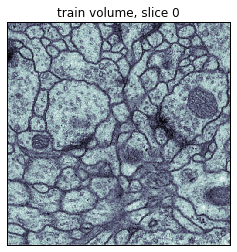

In [21]:
print("Running on system: %s" % socket.gethostname())


if True:
    # Using a local copy of data volume
    #inDir = '/Users/graywr1/code/bio-segmentation/data/ISBI2012/'
    inDir = '/home/pekalmj1/Data/EM_2012'
    X = ndp.nddl.load_cube(os.path.join(inDir, 'train-volume.tif'))
    Y = ndp.nddl.load_cube(os.path.join(inDir, 'train-labels.tif'))

    
    
# show some details.  Note that data tensors are assumed to have dimensions:
#   (#slices, #channels, #rows, #columns)
#
print('Train data shape is: %s  %s' % (str(X.shape), str(Y.shape)))
plt.imshow(X[0,0,...], interpolation='none', cmap='bone')
plt.title('train volume, slice 0')
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()

## Step 3: Training

In [ ]:
# Note that for demonstration purposes we use an artifically low 
# number of training slices and epochs.  For actualy training, 
# you would use more data and train for longer.

train_slices = np.arange(2)     # e.g. change to np.arange(25)
valid_slices = np.arange(25,30)
n_epochs = 1

tic = time.time()
model = ndp.nddl.train_model(X[train_slices,...], np.squeeze(Y[train_slices, ...]),
                             X[valid_slices,...], np.squeeze(Y[valid_slices, ...]), 
                             nEpochs=n_epochs, log=logger)

print("Time to train: %0.2f sec" % (time.time() - tic))


[2016-11-04 14:13:13,409:train_model:WARNING]  No output directory specified - are you sure this is what you want?
[2016-11-04 14:13:13,480:train_model:INFO]  training volume dimensions:   (2, 1, 512, 512)
INFO:train_model:training volume dimensions:   (2, 1, 512, 512)
[2016-11-04 14:13:13,481:train_model:INFO]  training values min/max:      0, 1
INFO:train_model:training values min/max:      0, 1
[2016-11-04 14:13:13,497:train_model:INFO]  training class labels:        [ 0.  1.]
INFO:train_model:training class labels:        [ 0.  1.]
[2016-11-04 14:13:13,512:train_model:INFO]      class 0 has 117127 instances
INFO:train_model:    class 0 has 117127 instances
[2016-11-04 14:13:13,514:train_model:INFO]      class 1 has 407161 instances
INFO:train_model:    class 1 has 407161 instances
[2016-11-04 14:13:13,514:train_model:INFO]  
INFO:train_model:
[2016-11-04 14:13:13,515:train_model:INFO]  validation volume dimensions: (5, 1, 512, 512)
INFO:train_model:validation volume dimensions: (5,